### 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, `voice.csv`. 

In [13]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('data/voice.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [14]:
# Melihat jumlah data dan tipe data
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [15]:
# Melakukan label encoding
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

Text(0.5, 1.0, 'Correlation Heatmap')

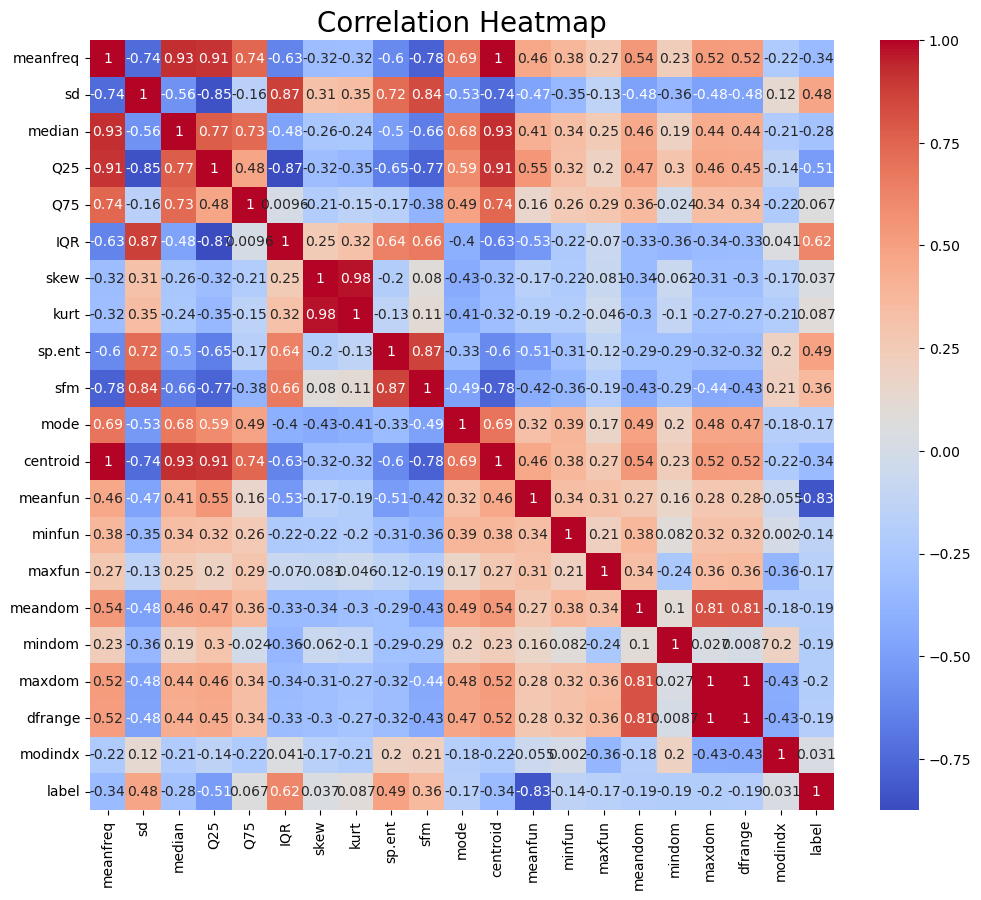

In [18]:
# Data visualization
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)

In [19]:
corr_rank = corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
print(corr_rank[corr_rank['level_0'] == 'label'])

    level_0   level_1         0
22    label     label  1.000000
45    label   meanfun  0.833921
90    label       IQR  0.618916
120   label       Q25  0.511455
125   label    sp.ent  0.490552
136   label        sd  0.479539
206   label       sfm  0.357499
226   label  meanfreq  0.337415
227   label  centroid  0.337415
288   label    median  0.283919
349   label    maxdom  0.195657
354   label    mindom  0.194974
360   label   dfrange  0.192213
364   label   meandom  0.191067
374   label      mode  0.171775
379   label    maxfun  0.166461
392   label    minfun  0.136692
408   label      kurt  0.087195
418   label       Q75  0.066906
427   label      skew  0.036627
430   label   modindx  0.030801


In [21]:
# Separate features (X) and labels (y)
X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9416403785488959


In [26]:
# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[265  32]
 [  5 332]]


In [27]:
# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       297
           1       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



### 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
   ### 1. Menggunakan data `spam.csv`
   ### 2. Fitur `CountVectorizer` dengan mengaktifkan **stop_words**
   ### 3. Evaluasi hasilnya

In [29]:
# load dataset
data = pd.read_csv('data/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [30]:
# Data Preprocessing
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# Rename Columns

new_cols = {
	'v1': 'labels',
	'v2': 'SMS'
} 

data = data.rename(columns=new_cols)
data.head()

,labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# Label Encoding
data.value_counts('labels')

labels
ham     4825
spam     747
dtype: int64

In [33]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [34]:
# data describe
data.describe()

,labels,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [35]:
new_label = {
	'ham': 0,
	'spam': 1
}

data['labels'] = data['labels'].map(new_label)
data.head()

,labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
# separate features (X) and labels (y)
X = data['SMS'].values
y = data['labels'].values

In [38]:
# Vectorize the features
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(X)
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [39]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Training Data
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print('Accuracy on train data: ', acc_train)
print('Accuracy on test data: ', acc_test)

Accuracy on train data:  0.9950639443571909
Accuracy on test data:  0.9802690582959641


### 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
   ### 1. Menggunakan data `spam.csv`
   ### 2. Fitur `TF-IDF` dengan mengaktifkan **stop_words**
   ### 3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
   ### 4. Berikan kesimpulan fitur mana yang terbaik pada kasus data `spam.csv`

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [43]:
X = data['SMS'].values
y = data['labels'].values

X = tfidf_vectorizer.fit_transform(X)

In [44]:
print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [45]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print('Accuracy on train data: ', acc_train)
print('Accuracy on test data: ', acc_test)

Accuracy on train data:  0.9811532420910927
Accuracy on test data:  0.968609865470852
